# NeuroFlow Data Challenge
Elton Chan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from time import sleep

## Part 1:

In [164]:
data = pd.read_csv('phq_all_final.csv')
data.head(5)

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [165]:
data.shape

(53698, 5)

In [166]:
# cleaning data
data.dtypes

date                    object
patient_id               int64
type                    object
patient_date_created    object
score                    int64
dtype: object

In [167]:
# converting date and patient_date_created to datetime for easier analysis
data['date'] = pd.to_datetime(data['date'])
data['patient_date_created'] = pd.to_datetime(data['patient_date_created'])
data.dtypes

date                    datetime64[ns]
patient_id                       int64
type                            object
patient_date_created    datetime64[ns]
score                            int64
dtype: object

In [168]:
# all test types are gad7, meaning row is useless
data['type'].value_counts()

gad7    53698
Name: type, dtype: int64

In [169]:
# drop it
data = data.drop(columns = ['type'])
data.head()

,date,patient_id,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,2019-06-03 13:23:02.635680,1
2,2019-10-07 18:23:29.611351,14338,2019-06-03 13:32:30.668460,10
3,2019-11-04 20:16:28.610965,14338,2019-06-03 13:32:30.668460,7
4,2019-12-02 20:56:55.966354,14338,2019-06-03 13:32:30.668460,9


In [74]:
# see how many times each patient comes up
data['patient_id'].value_counts()[:5], f"{len(data['patient_id'].value_counts())} unique patients"

(10687    84
 6574     42
 12307    38
 13874    34
 13855    34
 Name: patient_id, dtype: int64,
 '15502 unique patients')

In [30]:
# labeling each row as the # of tests the patient has taken at that point
new_df = data[0:0].copy()

# progress bar set up
loopy_count = 0 
length = len(data['patient_id'].unique())

# looping through each patient
for patient in data['patient_id'].unique():
    working_df = data[data['patient_id'] == patient]
    working_df = working_df.sort_values('date')
    working_df['running_count'] = np.arange(1, len(working_df) + 1)
    new_df = pd.concat([new_df, working_df], ignore_index = True)
    
    j = (loopy_count + 1) / length
    loopy_count += 1
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
    sys.stdout.flush()
new_df['running_count'] = (new_df['running_count']).astype(int)
new_df.head(10)

[====================] 100%

,date,patient_id,patient_date_created,score,running_count
0,2019-08-26 13:32:43.019162,8430,2019-06-03 13:23:02.635680,6,1
1,2019-11-15 17:55:11.364877,8430,2019-06-03 13:23:02.635680,1,2
2,2019-10-07 18:23:29.611351,14338,2019-06-03 13:32:30.668460,10,1
3,2019-11-04 20:16:28.610965,14338,2019-06-03 13:32:30.668460,7,2
4,2019-12-02 20:56:55.966354,14338,2019-06-03 13:32:30.668460,9,3
5,2019-09-17 14:08:49.642430,17028,2019-06-03 14:24:06.741810,6,1
6,2019-11-11 14:42:40.889057,17028,2019-06-03 14:24:06.741810,9,2
7,2019-06-07 13:05:01.435941,3788,2019-06-03 14:48:09.129756,0,1
8,2019-06-14 12:31:58.918124,3788,2019-06-03 14:48:09.129756,0,2
9,2019-06-14 12:32:23.674673,3788,2019-06-03 14:48:09.129756,0,3


In [72]:
print(f"{len(new_df[new_df['running_count'] == 1])} first assessments", 
      f"{len(new_df[new_df['running_count'] == 2])} second assessments")
print(f"{len(new_df[new_df['running_count'] == 1]) - len(new_df[new_df['running_count'] == 2])} patients took the"
      + " GAD-7 test only once")

15502 first assessments 10905 second assessments
4597 patients took the GAD-7 test only once


#### insights so far: 
- there are 15,502 patients who took the assessment at least once
- of those 15,502, 10,905 went on to take more than 1
- 4,597 patients stopped taking these assessments after the first
- there are a handful of patients who took the assessment more than 20 times
- the most assessments a single patient took was 84, followed by 42

In [96]:
# get 2 new dataframes, one with patients who only took 1 test, another with patients who took more than 1 test
index_of_patients = new_df['patient_id'].value_counts().index
single_test_patients = [index_of_patients[i] for i in np.arange(len(new_df['patient_id'].value_counts())) 
 if list(new_df['patient_id'].value_counts())[i] == 1]
multi_test_patients = [index_of_patients[i] for i in np.arange(len(new_df['patient_id'].value_counts())) 
 if list(new_df['patient_id'].value_counts())[i] > 1]

In [100]:
single_test_df = new_df[[(i in single_test_patients) for i in new_df['patient_id']]]
multi_test_df = new_df[[(i in multi_test_patients) for i in new_df['patient_id']]]
single_test_df.head()

,date,patient_id,patient_date_created,score,running_count
166,2019-06-16 17:58:41.376908,13646,2019-06-05 17:37:07.918028,7,1
167,2019-08-07 13:31:39.723182,16983,2019-06-05 18:46:47.124059,2,1
168,2019-06-16 09:49:57.421986,3245,2019-06-05 18:47:53.591077,11,1
180,2019-07-31 21:02:33.977812,17973,2019-06-05 19:38:41.070446,15,1
189,2019-06-16 12:10:21.668107,9098,2019-06-05 20:08:04.727758,20,1


In [114]:
np.median(list(single_test_df['score']))

5.0

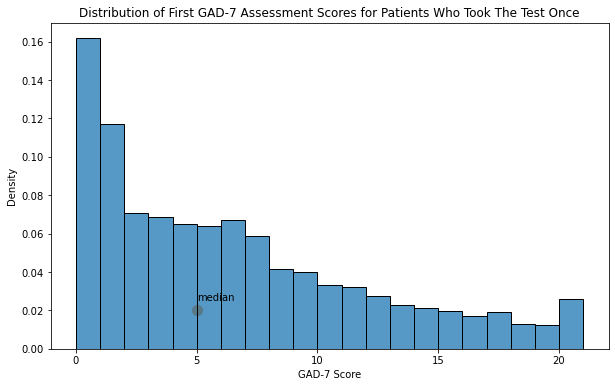

In [163]:
fig, ax = plt.subplots(figsize = [10, 6])
this_data = list(single_test_df['score'])
sns.histplot(x = this_data, bins = np.arange(min(this_data), max(this_data) + 1), stat = 'density', ax = ax)
sns.scatterplot(x = np.median(list(single_test_df['score'])), y = [0.02], s = [150])
ax.annotate('median', xy = [np.median(list(single_test_df['score'])), 0.025])
ax.set_title('Distribution of First GAD-7 Assessment Scores for Patients Who Took The Test Once')
ax.set_xlabel('GAD-7 Score')
plt.show()

#### Insights from this visualization:
- Nothing conclusive, preliminary thoughts were that single tested patients would have a much higher density of lower scores, indicating they didn't need further treatment and therefore no need for more tests
- The median of these scores is 5, important for comparison later to see if these scores are distributed higher or lower
- Need to examine multi-timed assessment takers to analyze differences

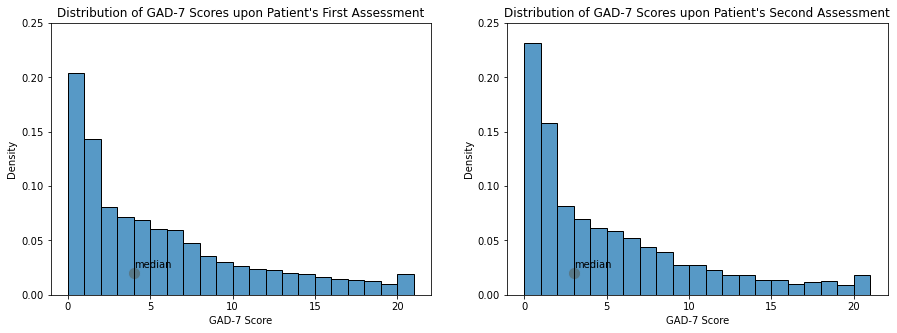

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 5])
first_test_scores = list(multi_test_df[multi_test_df['running_count'] == 1]['score'])
second_test_scores = list(multi_test_df[multi_test_df['running_count'] == 2]['score'])
sns.histplot(x = first_test_scores, 
                  bins=np.arange(min(first_test_scores), max(first_test_scores) + 1), ax = ax1, stat = 'density')
sns.scatterplot(x = np.median(first_test_scores), y = [0.02], s = [150], ax = ax1)
ax1.annotate('median', xy = [np.median(first_test_scores), 0.025])
ax1.set_title("Distribution of GAD-7 Scores upon Patient's First Assessment")
ax1.set_xlabel("GAD-7 Score")
ax1.set_ylim(ymax = 0.25, ymin = 0)

sns.histplot(x = second_test_scores, 
                  bins=np.arange(min(second_test_scores), max(second_test_scores) + 1), ax = ax2, stat = 'density')
sns.scatterplot(x = np.median(second_test_scores), y = [0.02], s = [150], ax = ax2)
ax2.annotate('median', xy = [np.median(second_test_scores), 0.025])
ax2.set_title("Distribution of GAD-7 Scores upon Patient's Second Assessment")
ax2.set_xlabel("GAD-7 Score")
ax2.set_ylim(ymax = 0.25, ymin = 0)
plt.show()

#### Insights from these visualizations:
- Alot:
- Comparing within these two graphs of multi-timed assessment takers, we see a large leftward shift of the distribution in between the first and second assessment, indicating positive improvement or successful treatment in between assessments
    - The 0 and 1 GAD-7 score bars heighten noticably while the higher score bars lower noticably
- We also see the median shift from 4 to 3, also indicating overall improvements
- Comparing multi-timed assessment takers first test results to the single-timed assessment takers first test results, we see a more leftward shift as well. This means that the results of multi-timed test takers started off more positive compared to single-timed test takers.
- To some degree, whatever treatments take place within the 1st and 2nd tests have an overarching positive result in terms of GAD-7 scores

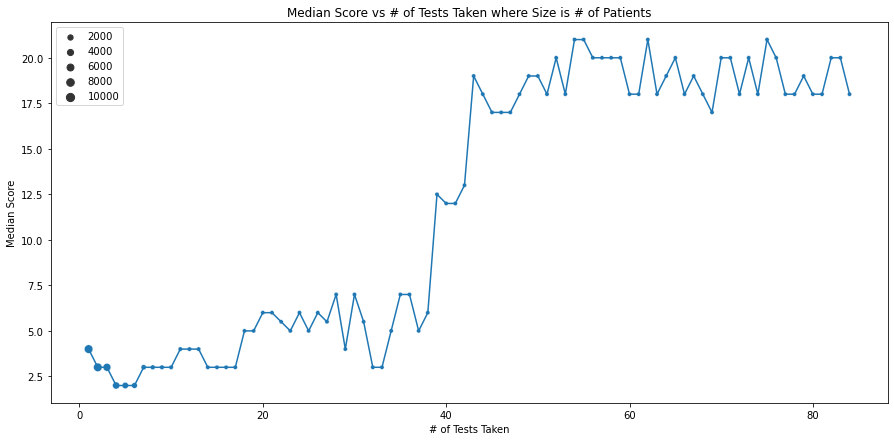

In [160]:
# Analyzing changes in the distribution in between GAD-7 tests using median as the metric
medians = multi_test_df.groupby('running_count', as_index = False).median().drop(columns = ['patient_id'])
medians['count'] = list(multi_test_df.groupby('running_count', as_index = False).count()['score'])
fig, ax = plt.subplots(figsize = [15, 7])
sns.scatterplot(x = medians['running_count'], y = medians['score'], size = medians['count'])
sns.lineplot(x = medians['running_count'], y = medians['score'])
ax.set_title('Median Score vs # of Tests Taken where Size is # of Patients')
ax.set_ylabel('Median Score')
ax.set_xlabel('# of Tests Taken')
plt.show()

#### Insights:
- For the first 6 assessments, the therapy or treatments in between seem to have a positive impact on lowering these scores, shown by the median steadily decreasing
- However, after the first 6, our median begins to rise again possibly explained by the fact that the sample size begins to taper off, leaving only the individuals who have not gotten better within the first 6 assessment periods. These patients continuing to take these assessments would naturally be harder to provided therapy and treatment for and we therefore wouldn't see much improvement within the results of these tests regardless.

In [170]:
data

,date,patient_id,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,2019-06-03 13:23:02.635680,1
2,2019-10-07 18:23:29.611351,14338,2019-06-03 13:32:30.668460,10
3,2019-11-04 20:16:28.610965,14338,2019-06-03 13:32:30.668460,7
4,2019-12-02 20:56:55.966354,14338,2019-06-03 13:32:30.668460,9
...,...,...,...,...
53693,2020-07-31 13:59:13.201741,10683,2020-07-31 13:54:20.164253,1
53694,2020-07-31 15:08:56.079027,12344,2020-07-31 15:06:51.043730,1
53695,2020-07-31 15:52:50.353265,17475,2020-07-31 15:40:07.726529,7
53696,2020-07-31 17:36:57.057913,9069,2020-07-31 17:33:27.096572,3


In [172]:
data[data['patient_id'] == 8430]

,date,patient_id,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,2019-06-03 13:23:02.635680,1


In [180]:
# Graphing tool to help hospitals visualize improvements
def graph_it(patient_ids, df):
    '''
    Given a list of patients IDs, or single patient ID, and a dataframe resembling the one provided,
    returns a line plot of all the patient's scores as a time series
    '''
    if not isinstance(patient_ids, list):
        patient_ids = [patient_ids]
    fig, ax = plt.subplots(len(patient_ids), figsize = [14, 4 * len(patient_ids)])
    count = 0
    for patient_id in patient_ids:
        working = df[df['patient_id'] == patient_id]
        if len(patient_ids) > 1:
            sns.lineplot(data = working, x = 'date', y = 'score', ax = ax[count])
            sns.scatterplot(data = working, x = 'date', y = 'score', ax = ax[count])
        else:
            sns.lineplot(data = working, x = 'date', y = 'score', ax = ax)
            sns.scatterplot(data = working, x = 'date', y = 'score', ax = ax)
        count += 1
    plt.show()
    return

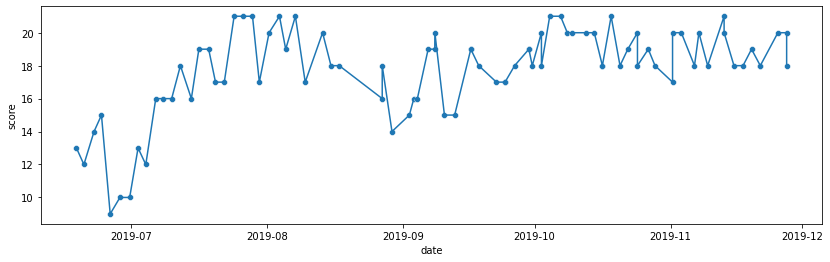

In [185]:
graph_it(10687, data)

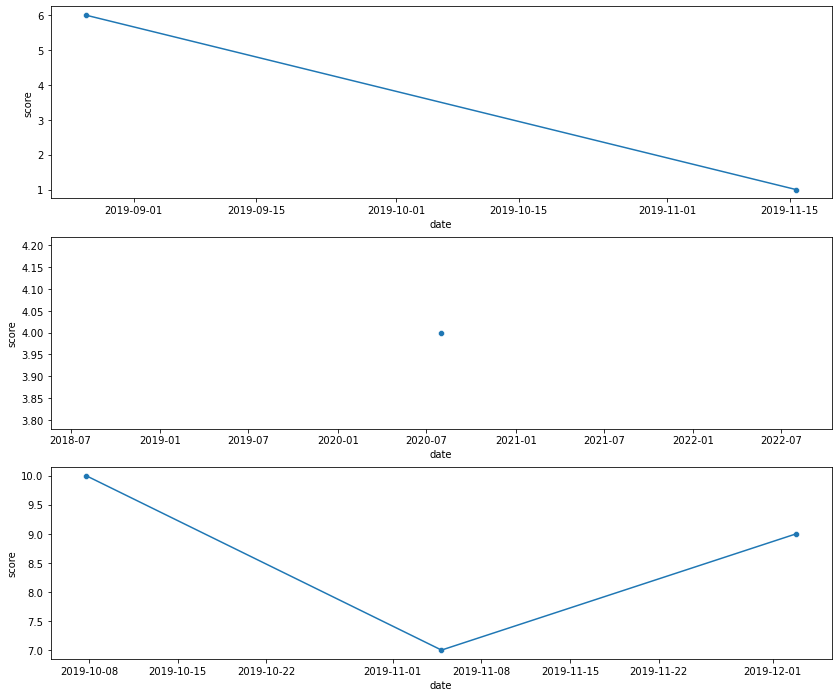

In [184]:
graph_it([8430, 4870, 14338], data)

#### Moving forward from this visualization:
- A more interactive widget on a website or portal wouldbe helpful for hospitals to use on their own software
- An option to overlay all inputted patient ID charts onto one visual for easier comparison
- An option to compare the patient with other patients' charts that match the # of tests, diagnosis, and treatment

#### Additional Data that would be helpful to have:
- The types of treatment these patients would be recieving in between assessments
    - Visualizing trends and differences between different types of treatment could help determine which treatments work best within what periods of treatments and for how long they are effective
- The types anxiety disorders each patient is initially diagnosed with and finally diagnosed with
    - Having these data combined with the treatment data from above would help formulate effective treatment plans for different types of illnesses, both before and after we have a complete diagnosis. 

## Part 2

In [186]:
import sqlite3

### #1

In [ ]:
"""
WITH cohorts as (
  SELECT
    date_trunc('month', u.created_at)::date as cohort_month, u.user_id
  FROM users u
)
SELECT 
FROM cohorts c, exercises e
WHERE c.user_id = e.user_id
"""

### #2

In [187]:
"""
WITH prep as 
(SELECT COUNT(e.user_id) AS cnt, e.user_id AS id 
    FROM exercises e 
    GROUP BY e.user_id)
SELECT COUNT(cnt), cnt 
FROM prep 
GROUP BY cnt
"""

'\nWITH prep as \n(SELECT COUNT(e.user_id) AS cnt, e.user_id AS id \n    FROM exercises e \n    GROUP BY e.user_id)\nSELECT COUNT(cnt), cnt \nFROM prep \nGROUP BY cnt\n'

### #3

In [188]:
"""
SELECT p.organization_name
FROM Providers p, Phq9 q
WHERE p.provider_id = q.provider_id
GROUP BY p.organization_name
ORDER BY AVG(SCORE) DESC
LIMIT 5
"""

'\nSELECT p.organization_name\nFROM Providers p, Phq9 q\nWHERE p.provider_id = q.provider_id\nGROUP BY p.organization_name\nORDER BY AVG(SCORE) DESC\nLIMIT 5\n'